# Visualization of predictions for analysis

*Run this notebook in the ipynb-venv environment*

Because we want to better understand the actions and predictions of the network, I created a visualization notebook, which shall be used in order to visualize saved results for better inspection of how exactly they were predicting properly and how they did not. By the end of this notebook we should have a visualization function for the data input, and alos a visualization function for the output, which displays the predictions int wo different ways for now. One of them being just the marked points within the point cloud, and then a more detailed view of the TP, FP, TN and FN, so we can maybe better understand how and where the predictions fail ro have difficulties.

## Imports

In [2]:
# For paths
import os 

# For data processing
import torch
import numpy as np

# For 3D visualization
import open3d as o3d
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import proj3d


## Functions to be used in this notebook

Below here we have the cell to be run in order to define all the functions created and used in this notebook.

In [3]:
# Setting the root for this repo
ROOT = os.path.realpath("..")

# Creating/ Making the point cloud
def makePC(point_data, color_data=np.array([])):
    pcd = o3d.geometry.PointCloud() #Create PC object
    pcd.points = o3d.utility.Vector3dVector(point_data) #Give coordinates
    #Coloring the PC
    if len(color_data) == 0:
        pcd.paint_uniform_color([1, 0, 0])
    else:
        pcd.colors = o3d.utility.Vector3dVector(color_data)
    return pcd

print(ROOT)
#/home/innolidix/Pointnet_Pointnet2_pytorch/data/testdata/data_labelled_int.npy

/home/innolidix/Pointnet_Pointnet2_pytorch


## Visualizing the input data

Before jumping into the visualization of the prediction we will have a short script to visualize and display the input data. With both presentation/ visualizations we can the possible investigate and analyze them side by side, at least that is the idea. 

### Visualizing the entire input point cloud

Firstly, we will start by visualizing the entire point cloud input. This means we visualize the entire point cloud consisting of 662.525 points.

#### Quick visualization with matplotlib.pyplot

As a start we will try to visualize the point cloud with the commonly know matplotlib library to see whether it works.

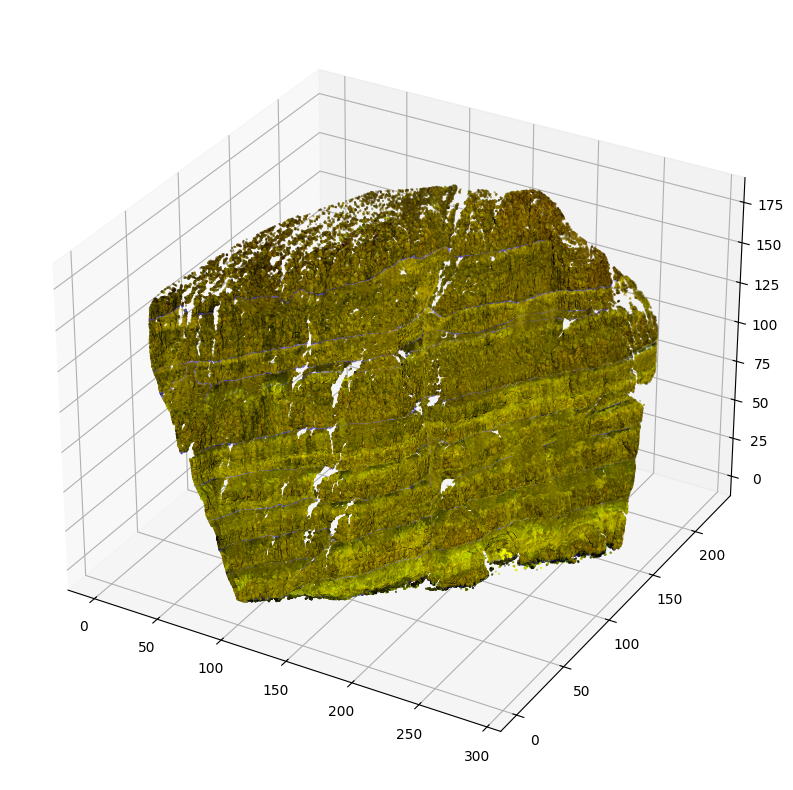

In [13]:
# Path to input data
input_data_path = ROOT + "/data/testdata/data_labelled_int.npy"

# Load the input data
input_pc = np.load(input_data_path)

# Assigning xyz values
x = input_pc[:,0]
y = input_pc[:,1]
z = input_pc[:,2]
# Assigning color channels
red_c = input_pc[:, 4]
green_c = input_pc[:, 5]
blue_c = input_pc[:, 6]
#Shifting color range ot be between [0, 1]
red_c = (red_c - np.min(red_c)) / (np.max(red_c) - np.min(red_c))
green_c = (green_c - np.min(green_c)) / (np.max(green_c) - np.min(green_c))
blue_c = (blue_c - np.min(blue_c)) / (np.max(blue_c) - np.min(blue_c))
# Creating individual color arrray
rgb_list = np.ones((input_pc.shape[0], 3))
rgb_list[:, 0] = red_c
rgb_list[:, 1] = green_c
rgb_list[:, 2] = blue_c 

# Visualization
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x, y, z, c=rgb_list, s=0.1)
plt.show()


For a quick look this is ok, the processing time does not take too long, but for some reason the colors seem slightly off as it looks like it generally gets a higher green hue than it should. But for now, we leave it as I suppose this problem might not arise when displaying the values in a proper 3D projection via the open3d package.

#### 3D visualization with open3d

Subsequently, we want to properly visualize the point cloud in a 3D environment which also allows you to work with point cloud, and properly rotate and inspect it. This can be done with the open3D python package. 

In [7]:
# Path to input data
input_data_path = "/Users/nk/Documents/GitHubRepos/Pointnet_Pointnet2_pytorch/data/testdata/data_labelled_int.npy"

# Load the input data
input_data = np.load(input_data_path)

# Assigning the coordinates
input_points = np.stack([input_data[:, 0], 
                         input_data[:, 1], 
                         input_data[:, 2]], axis=1)
# Assigning color channels
red_c   = np.array(input_data[:, 4])
green_c = np.array(input_data[:, 5])
blue_c  = np.array(input_data[:, 6])
# Converting color channels to [0, 1] range
red_c   = (red_c - np.min(red_c)) / (np.max(red_c) - np.min(red_c))
green_c = (green_c - np.min(green_c)) / (np.max(green_c) - np.min(green_c))
blue_c  = (blue_c - np.min(blue_c)) / (np.max(blue_c) - np.min(blue_c))
# Creating color data
color_data = np.stack([red_c, green_c, blue_c], axis=1)

# Make the point cloud to be displayed
viz_pcd = makePC(input_points, color_data)

# Print check for point cloud
print("------ Print check for input point cloud ------")
print(f"The input point cloud consists of {len(viz_pcd.points)} number of points.")
print(f"The minimum coordinates of the point cloud are: {np.amin(np.asarray(viz_pcd.points), axis=0)}")
# Minimum will be [0, 0, 0] as the input data has been shifted already

# Cropping the point cloud using bounding boxes
bbox = viz_pcd.get_oriented_bounding_box()
bbox.color = (0, 1, 0) #bbox in green
viz_pcd_cropped = viz_pcd.crop(bbox)

# Print check for cropped point cloud
print("------ Print check for cropped input point cloud ------")
print(f"The cropped point cloud consists of {len(viz_pcd_cropped.points)} number of points.")
print(f"The bounding box cropping removed {len(viz_pcd.points) - len(viz_pcd_cropped.points)} points.")
print(f"The minimum coordinates of the cropped point cloud are: {np.amin(np.asarray(viz_pcd_cropped.points), axis=0)}")
# Minimum will be [0, 0, 0] as the input data has been shifted already

# Visualizing the point cloud
o3d.visualization.draw_geometries([viz_pcd_cropped])

------ Print check for input point cloud ------
The input point cloud consists of 662525 number of points.
The minimum coordinates of the point cloud are: [0. 0. 0.]
------ Print check for cropped input point cloud ------
The cropped point cloud consists of 662522 number of points.
The bounding box cropping removed 3 points.
The minimum coordinates of the cropped point cloud are: [0. 0. 0.]
[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display
[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


: 

### Visualizing the sub-sampled point cloud as used in the model

As a next step we want to visualize the subsampled point cloud, which is processed in the model. As usually through the subsampling and for the standardization of the batches, some points usually are left over and not introduced to the model. Ideally, we will not see any difference in the display, but that is what we are checking for below here. 

In [3]:
# Sub-smaple the input point cloud as done in the model

# Display the sub-sampled point cloud

### Short description and synthesis of visualized input data

*Descirption of input data will follow here...*

## Visualizations of the prediction(s)

After having visualized the input data, we will now continue with visualizing the predictions made by the model. Firstly, we will investigate the prediction rather simply by displaying it according to the classification predictions made by the model (fracture vs. non-fracture). Secondly, we will elevate that visualization by itnegrating a colouring option for the respective classification fo the prediction into either TP, FP, TN and FN. By doing that we hope to get a better feeling and overview for analysis of the predictions and the dispersion of the respective predictions. Through that, I am sure we ill be able to either start filtering the prediction properly to get cleaner results, or we might get some hints on where the network has problems of correclty classifying points.